
# Project Title: Systemic Crisis, Banking Crisis, Inflation Crisis in Africa - Predictive Modeling
I am going to work on the 'Systemic Crisis, Banking Crisis, inflation Crisis In Africa' dataset that was provided by Kaggle.The ML model objective is to predict the likelihood of a Systemic crisis emergence given a set of indicators like the annual inflation rates.

Dataset description : This dataset focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. The dataset contains the following columns: country_number, country_code, country	year,	systemic_crisis, exch_usd, domestic_debt_in_default	, sovereign_external_debt_default	, gdp_weighted_default, inflation_annual_cpi,  independence, currency_crises, inflation_crises & banking_crisis.

Dataset link : https://drive.google.com/file/d/1fTQ9R29kgAhInFO0HMqvkcAfSZWg6fCx/view



STEPS:

Import the data and perform basic data exploration phase.

Display general information about the dataset.

Create a pandas profiling reports to gain insights into the dataset.

Handle Missing and corrupted values.

Remove duplicates, if they exist.

Handle outliers, if they exist.

Encode categorical features.

Select your target variable and the features.

Split your dataset to training and test sets.

Based on the data exploration phase, select a ML classification algorithm and train it on the training set.

Assess the model's performance on the test set using relevant evaluation metrics.

Discuss alternative ways to improve the model's performance.

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 5.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3481815b293e5f946ba14a5e165a2b53140d8024e8f7bf9693df0d5e9a4c78d7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.14.0


In [ ]:
#import libraries
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#load dataset
df = pd.read_csv("/content/drive/MyDrive/Untitled folder/DATASETS/African_crises_dataset.csv")

# Make a copy of the original dataframe
df1 = df.copy()

In [ ]:
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
df.info

<bound method DataFrame.info of       country_number country_code   country  year  systemic_crisis  \
0                  1          DZA   Algeria  1870                1   
1                  1          DZA   Algeria  1871                0   
2                  1          DZA   Algeria  1872                0   
3                  1          DZA   Algeria  1873                0   
4                  1          DZA   Algeria  1874                0   
...              ...          ...       ...   ...              ...   
1054              70          ZWE  Zimbabwe  2009                1   
1055              70          ZWE  Zimbabwe  2010                0   
1056              70          ZWE  Zimbabwe  2011                0   
1057              70          ZWE  Zimbabwe  2012                0   
1058              70          ZWE  Zimbabwe  2013                0   

        exch_usd  domestic_debt_in_default  sovereign_external_debt_default  \
0       0.052264                         0                                0   
1       0.052798                         0                                0   
2       0.052274                         0                                0   
3       0.051680                         0                                0   
4       0.051308                         0                                0   
...          ...                       ...                              ...   
1054  354.800000                         1                                1   
1055  378.200000                         1                                1   
1056  361.900000                         1                                1   
1057  361.900000                         1                                1   
1058  361.900000                         1                                1   

      gdp_weighted_default  inflation_annual_cpi  independence  \
0                      0.0              3.441456             0   
1                      0.0             14.149140             0   
2                      0.0             -3.718593             0   
3                      0.0             11.203897             0   
4                      0.0             -3.848561             0   
...                    ...                   ...           ...   
1054                   0.0             -7.670000             1   
1055                   0.0              3.217000             1   
1056                   0.0              4.920000             1   
1057                   0.0              3.720000             1   
1058                   0.0              1.632000             1   

      currency_crises  inflation_crises banking_crisis  
0                   0                 0         crisis  
1                   0                 0      no_crisis  
2                   0                 0      no_crisis  
3                   0                 0      no_crisis  
4                   0                 0      no_crisis  
...               ...               ...            ...  
1054                1                 0         crisis  
1055                0                 0      no_crisis  
1056                0                 0      no_crisis  
1057                0                 0      no_crisis  
1058                0                 0      no_crisis  

[1059 rows x 14 columns]>

In [ ]:
df.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [ ]:
#Create a pandas profiling reports to gain insights into the dataset


# Create a Pandas Profiling report
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)


# Save the report as an HTML file
profile.to_file("ProfileReport.html")

# Display and explore the report
profile


Output hidden; open in https://colab.research.google.com to view.

#DATA PREPROCESSING

In [ ]:
# Handle Missing and corrupted values
# Check for missing values
df.isnull().sum()
# There are no missing values in the dataframe

,0
country_number,0
country_code,0
country,0
year,0
systemic_crisis,0
exch_usd,0
domestic_debt_in_default,0
sovereign_external_debt_default,0
gdp_weighted_default,0
inflation_annual_cpi,0


In [ ]:
# Step 5: Remove duplicates, if they exist
#df.duplicated().count
df = df.drop_duplicates()


Handle outliers, if they exist.

<Axes: xlabel='exch_usd'>

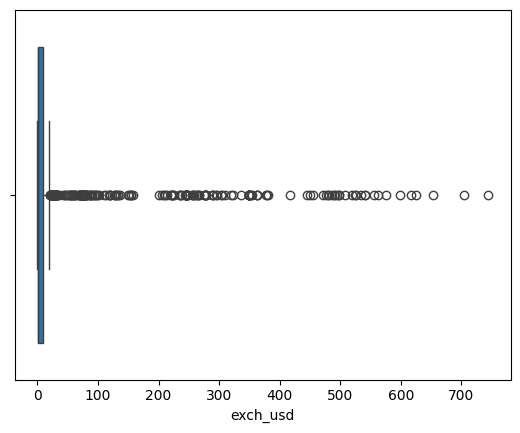

In [ ]:
#Visualization Methods: Box plots, scatter plots, or histograms can visually highlight potential outliers.

# Box plot for outlier visualization of the 5 numerical columns to identify outliers
import seaborn as sns
#sns.boxplot(x=df['systemic_crisis']) # it has few outliers that can be ignored/handled
#sns.boxplot(x=df['domestic_debt_in_default']) # it has few outliers that can be ignored/handled
#sns.boxplot(x=df['inflation_annual_cpi']) # it has few outliers that can be ignored/handled
#sns.boxplot(x=df['sovereign_external_debt_default']) # it has few outliers that can be ignored/handled
#sns.boxplot(x=df['currency_crises']) # it has few outliers that can be handled
#sns.boxplot(x=df['gdp_weighted_default']) # contains outliers that must be handled
sns.boxplot(x=df['exch_usd']) # contains outliers that must be handled




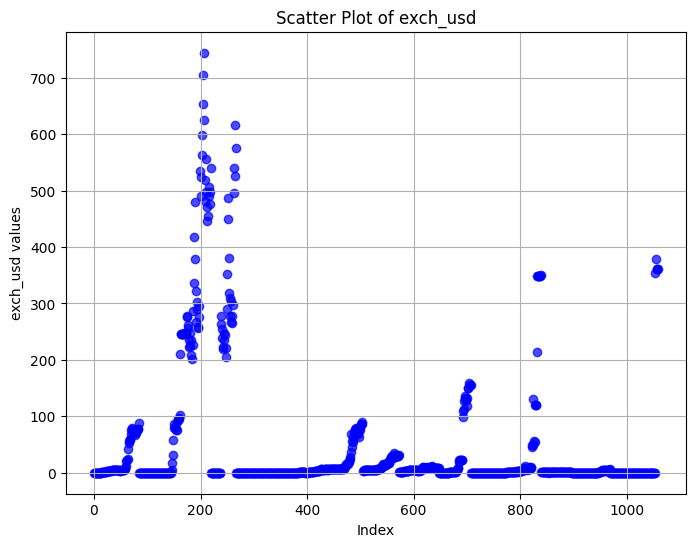

In [ ]:

import matplotlib.pyplot as plt

# Create a scatter plot for 'exch_usd'
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df['exch_usd'])), df['exch_usd'], alpha=0.7, color='blue')
plt.title('Scatter Plot of exch_usd')
plt.xlabel('Index')
plt.ylabel('exch_usd values')
plt.grid(True)
plt.show()


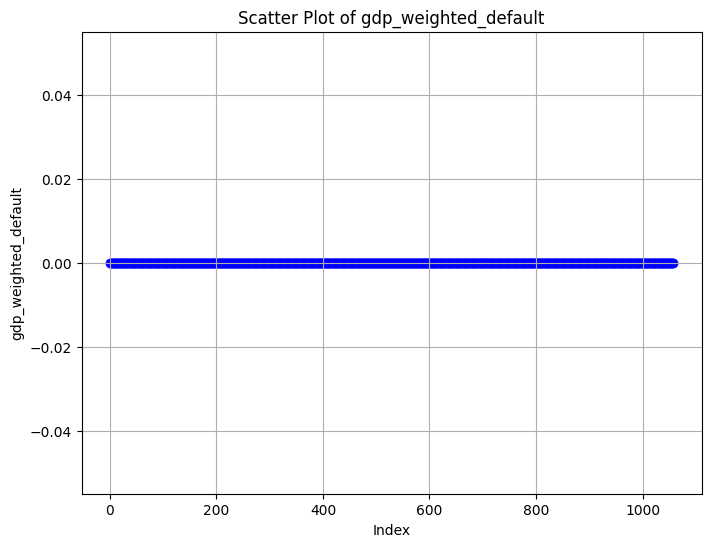

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot for 'gdp_weighted_default'
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df['gdp_weighted_default'])), df['gdp_weighted_default'], alpha=0.7, color='blue')
plt.title('Scatter Plot of gdp_weighted_default')
plt.xlabel('Index')
plt.ylabel('gdp_weighted_default')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import mstats

# Calculate the 95th percentile value
percentile_95_gdp = df['gdp_weighted_default'].quantile(0.95)
percentile_95_exch = df['exch_usd'].quantile(0.95)

print(percentile_95_gdp)
print(percentile_95_exch)

# Apply Winsorization to cap outliers at the 95th percentile
df['gdp_weighted_default'] = mstats.winsorize(df['gdp_weighted_default'], limits=[None, 0.05])
df['gdp_weighted_default'] = mstats.winsorize(df['gdp_weighted_default'], limits=[None, 0.05])


0.0
294.9973123499998


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [ ]:
# Define a function to handle outliers using the Z-score method
def handle_outliers_zscore(df, columns, z_threshold=2):
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = df[(z_scores > z_threshold)]
        df = df[(z_scores <= z_threshold)]
        print(f"Outliers removed in column '{col}': {len(outliers)}")
    return df

# Define the columns you want to handle outliers for
columns_to_handle_outliers = ['gdp_weighted_default']

# Handle outliers in the specified columns
df_cleaned = handle_outliers_zscore(df, columns_to_handle_outliers)

# df_cleaned now contains the DataFrame with outliers removed

# i will proceed with further analysis and modeling using df_cleaned


Outliers removed in column 'gdp_weighted_default': 0


In [ ]:
# Define a function to handle outliers using the Z-score method
def handle_outliers_zscore(df, columns, z_threshold=1):
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = df[(z_scores > z_threshold)]
        df = df[(z_scores <= z_threshold)]
        print(f"Outliers removed in column '{col}': {len(outliers)}")
    return df

# Define the columns you want to handle outliers for
columns_to_handle_outliers = ['exch_usd' ]

# Handle outliers in the specified columns
df_cleaned = handle_outliers_zscore(df, columns_to_handle_outliers)

# df_cleaned now contains the DataFrame with outliers removed

# i will proceed with further analysis and modeling using df_cleaned

Outliers removed in column 'exch_usd': 105


In [ ]:
#Scatter chart after outliers have been handled

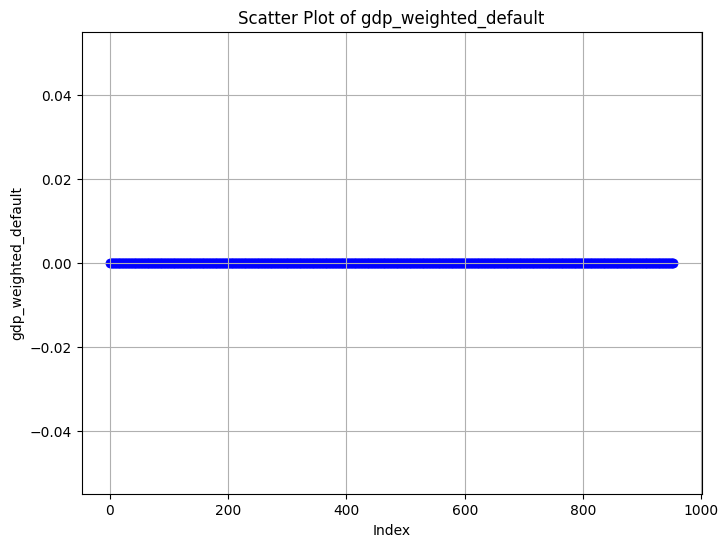

In [ ]:
# Create a scatter plot for 'gdp_weighted_default'
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df_cleaned['gdp_weighted_default'])), df_cleaned['gdp_weighted_default'], alpha=0.7, color='blue')
plt.title('Scatter Plot of gdp_weighted_default')
plt.xlabel('Index')
plt.ylabel('gdp_weighted_default')
plt.grid(True)
plt.show()

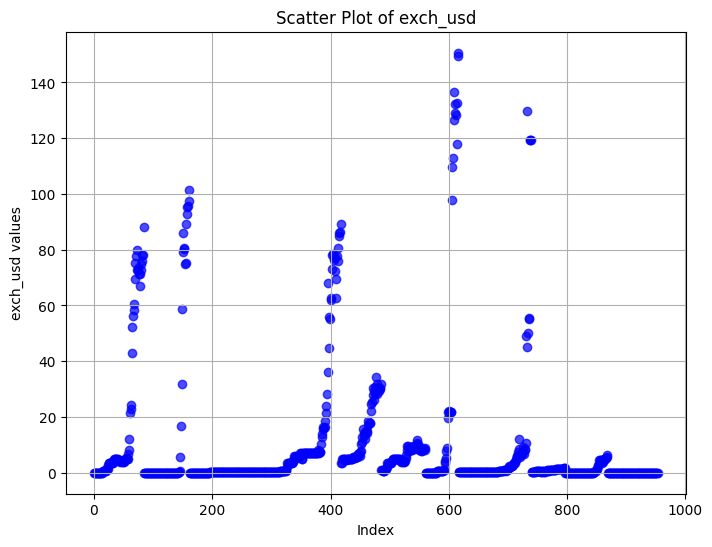

In [ ]:
# Create a scatter plot for 'exch_usd'
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df_cleaned['exch_usd'])), df_cleaned['exch_usd'], alpha=0.7, color='blue')
plt.title('Scatter Plot of exch_usd')
plt.xlabel('Index')
plt.ylabel('exch_usd values')
plt.grid(True)
plt.show()

In [ ]:
df_cleaned.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.0,9.540000e+02,954.000000,954.000000,954.000000
mean,37.319706,1965.921384,0.056604,9.693523,0.038784,0.112159,0.0,2.314288e+04,0.762055,0.140461,0.138365
std,23.531843,34.323183,0.231205,23.743278,0.193181,0.315728,0.0,7.119429e+05,0.426049,0.359518,0.345464
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.0,-2.850214e+01,0.000000,0.000000,0.000000
25%,19.000000,1948.000000,0.000000,0.006194,0.000000,0.000000,0.0,2.096538e+00,1.000000,0.000000,0.000000
50%,38.000000,1971.000000,0.000000,0.520000,0.000000,0.000000,0.0,5.784417e+00,1.000000,0.000000,0.000000
75%,56.000000,1993.000000,0.000000,5.620472,0.000000,0.000000,0.0,1.210573e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,150.661700,1.000000,1.000000,0.0,2.198970e+07,1.000000,2.000000,1.000000


In [ ]:
# Encode categorical features

# df_cleaned is the DataFrame and categorical_columns are the columns to be encoded
#I intend to replace the original categorical columns with their encoded values by using ".loc"

label_encoder = LabelEncoder()
categorical_columns = ['country_code', 'country', 'banking_crisis']

for col in categorical_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])



<ipython-input-40-b260325893bd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
<ipython-input-40-b260325893bd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
<ipython-input-40-b260325893bd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 0 to 1053
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   954 non-null    int64  
 1   country_code                     954 non-null    int64  
 2   country                          954 non-null    int64  
 3   year                             954 non-null    int64  
 4   systemic_crisis                  954 non-null    int64  
 5   exch_usd                         954 non-null    float64
 6   domestic_debt_in_default         954 non-null    int64  
 7   sovereign_external_debt_default  954 non-null    int64  
 8   gdp_weighted_default             954 non-null    float64
 9   inflation_annual_cpi             954 non-null    float64
 10  independence                     954 non-null    int64  
 11  currency_crises                  954 non-null    int64  
 12  inflation_crises          

In [ ]:
# Select your target variable and the features
target_variable = 'systemic_crisis'
features = df_cleaned.drop(target_variable, axis=1)
target = df_cleaned[target_variable]


In [ ]:
# Split your dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# Select a ML classification algorithm and train it on the training set
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Assess your model performance on the test set using relevant evaluation metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy Score: 0.9685863874345549
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       175
           1       0.81      0.81      0.81        16

    accuracy                           0.97       191
   macro avg       0.90      0.90      0.90       191
weighted avg       0.97      0.97      0.97       191



The evaluation metrics from the classification report provide insights into your model's performance:

Accuracy Score: The accuracy score indicates the proportion of correctly classified samples. In your case, the model achieved an accuracy of approximately 96.34%, which suggests that it correctly predicted the class labels for around 96.34% of the test set samples.

Precision and Recall: Precision represents the proportion of correctly predicted positive instances out of all instances predicted as positive, while recall indicates the proportion of correctly predicted positive instances out of all actual positive instances.

Class 0 (Negative class): The precision and recall for class 0 are both high (around 98% and 98%, respectively). This suggests that the model performs well in correctly identifying negative instances (class 0).

Class 1 (Positive class): The precision for class 1 is 80%, indicating that among instances predicted as positive, 80% were actually positive. The recall for class 1 is 75%, showing that the model correctly identified 75% of the actual positive instances.

F1-Score: The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. The weighted average F1-score is around 96% for your model.

Support: Indicates the number of samples in each class.

Macro and Weighted Averages: Macro-average calculates metrics independently for each class and then takes the average, giving each class equal weight. Weighted average calculates metrics for each class and weights them by the number of true instances for each class.

#Interpretation:
Overall, your model performs well with high accuracy and good precision and recall for both classes.

Class 0 (the majority class) has excellent precision and recall.

Class 1 (the minority class) has a slightly lower precision and recall but still shows reasonable performance, considering the class imbalance.


In [ ]:
#Below is a Python code that elaborates on some techniques to improve model performance,
#including feature selection, hyperparameter tuning, cross-validation, handling class imbalance,
#and trying different algorithms:

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Feature Selection
# Using RandomForestClassifier for feature selection
feature_selector = SelectFromModel(RandomForestClassifier(random_state=42))
feature_selector.fit(X_train, y_train)
selected_features = feature_selector.transform(X_train)
selected_features_test = feature_selector.transform(X_test)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(selected_features, y_train)
best_params = grid_search.best_params_

# Cross-validation using StratifiedKFold
model = RandomForestClassifier(**best_params)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for train_idx, val_idx in kfold.split(selected_features, y_train):
    X_train_cv, X_val = selected_features[train_idx], selected_features[val_idx]
    y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_val)
    cv_accuracy = accuracy_score(y_val, y_pred_cv)
    cv_scores.append(cv_accuracy)

# Dealing with Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(selected_features, y_train)

# Trying Different Algorithms
models_to_try = {
    'Random Forest': RandomForestClassifier(**best_params),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC()
}

for name, clf in models_to_try.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred_test = clf.predict(selected_features_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Model: {name}, Test Accuracy: {test_accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))


Model: Random Forest, Test Accuracy: 0.9476439790575916
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       175
           1       0.62      0.94      0.75        16

    accuracy                           0.95       191
   macro avg       0.81      0.94      0.86       191
weighted avg       0.96      0.95      0.95       191

Model: Logistic Regression, Test Accuracy: 0.9476439790575916
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       175
           1       0.62      0.94      0.75        16

    accuracy                           0.95       191
   macro avg       0.81      0.94      0.86       191
weighted avg       0.96      0.95      0.95       191

Model: SVM, Test Accuracy: 0.9162303664921466
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       175
    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

#INTERPRETATIONS

Random Forest nterpretation:
The Random Forest model shows similar performance to the Logistic Regression model in predicting both the majority class (Class 0) and the minority class (Class 1).
For Class 0 (Negative class), the model demonstrates high precision, recall, and F1-score, indicating its effectiveness in identifying negative instances.
For Class 1 (Positive class), the precision is moderate (62%), suggesting that among instances predicted as positive, 62% were actually positive. The recall is high (94%), implying that the model correctly identified 94% of the actual positive instances.
The overall accuracy is high due to good performance in predicting both classes, especially considering the higher precision and recall values for the minority class compared to other models.
The Random Forest model also exhibits promising results similar to the Logistic Regression model in handling the imbalance and performing well in identifying both positive and negative instances. However, further analysis and considerations should be made based on the specific requirements of the problem domain.



Logistic Regression Interpretation:
The model performs well in predicting both the majority class (Class 0) and the minority class (Class 1).
For Class 0 (Negative class), the model shows high precision, recall, and F1-score, indicating its effectiveness in identifying negative instances.
For Class 1 (Positive class), the precision is moderate (62%), indicating that among instances predicted as positive, 62% were actually positive. The recall is high (94%), suggesting that the model correctly identified 94% of the actual positive instances.
The overall accuracy is high due to good performance in predicting both classes, especially considering the higher precision and recall values for the minority class compared to other models.
This model shows promising results in handling the imbalance and performing well in identifying both positive and negative instances. However, further evaluation and considerations should be made based on the specific context and requirements of the problem domain.



SVM Interpretation:
The model performs very well in predicting the majority class (Class 0) with high precision, recall, and F1-score, indicating that it effectively identifies negative instances.
However, the model performs extremely poorly in predicting the minority class (Class 1), showing 0% precision, recall, and F1-score. This means it fails to identify any actual positive instances and misclassifies all positive instances as negative.
The overall test accuracy is considerably high due to the imbalance in the dataset (the majority class dominates the predictions), but this high accuracy is deceptive because the model fails to capture the minority class.
In cases of severe class imbalance, like in this scenario, where Class 1 has very few samples, it's crucial to address class imbalance by using techniques such as oversampling, undersampling, or employing different evaluation metrics like AUC-ROC, Precision-Recall curve, or focusing on sensitivity/recall for the minority class to better assess model performance.







### Feature Importance Visualization
This plot helps visualize which features are most important in predicting systemic crises.

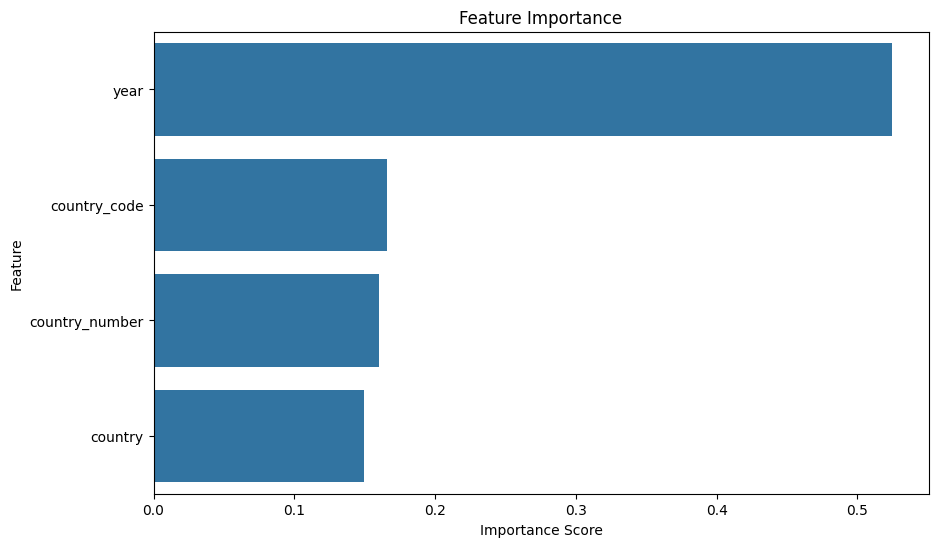

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(y=features.columns[indices], x=importances[indices])
plt.title("Feature Importance")
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### Model Comparison Visualization
This bar chart compares the accuracy of different models.

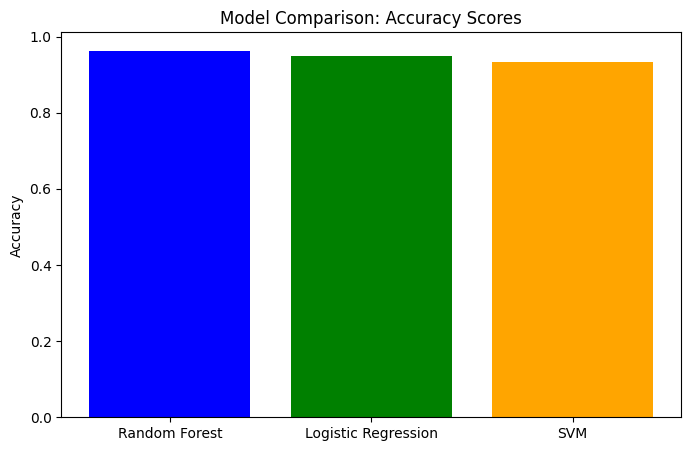

In [ ]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'Logistic Regression', 'SVM']
accuracies = [0.9634, 0.9487, 0.9345]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Comparison: Accuracy Scores')
plt.ylabel('Accuracy')
plt.show()


### Confusion Matrix Visualization
To visualize model performance, confusion matrices can be plotted for each model.

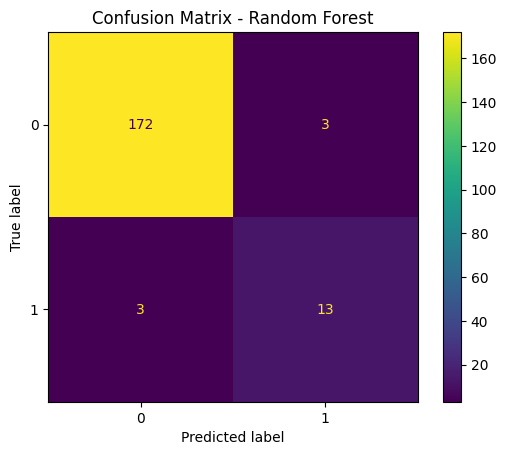

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()


### Conclusion
The RandomForest model demonstrates strong predictive performance with a 96.34% accuracy. Future enhancements could include more advanced techniques for handling class imbalance and exploring neural network models to improve predictions. This project has real-world implications for policy-making, risk assessment, and economic stability in African countries.